In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

## 데이터 로딩

이번 실습에 다룰 데이터는 날짜별 웹 트래픽입니다.

데이터의 형식은 tab 으로 셀이 구분되어 있는 tsv 파일이니 np.loadtxt 함수에서 구분자 옵션에 탭을 사용했습니다.

In [10]:
data = np.loadtxt('../data/web_traffic.tsv', delimiter='\t')
x = data[:,0]
y = data[:,1]

## 데이터 타입, 모양, 내용 확인

In [11]:
data.shape

(743, 2)

In [12]:
data[:20]

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       [  4.00000000e+00,   1.36500000e+03],
       [  5.00000000e+00,   1.48800000e+03],
       [  6.00000000e+00,   1.33700000e+03],
       [  7.00000000e+00,   1.88300000e+03],
       [  8.00000000e+00,   2.28300000e+03],
       [  9.00000000e+00,   1.33500000e+03],
       [  1.00000000e+01,   1.02500000e+03],
       [  1.10000000e+01,   1.13900000e+03],
       [  1.20000000e+01,   1.47700000e+03],
       [  1.30000000e+01,   1.20300000e+03],
       [  1.40000000e+01,   1.31100000e+03],
       [  1.50000000e+01,   1.29900000e+03],
       [  1.60000000e+01,   1.49400000e+03],
       [  1.70000000e+01,   1.15900000e+03],
       [  1.80000000e+01,   1.36500000e+03],
       [  1.90000000e+01,   1.27200000e+03],
       [  2.00000000e+01,   1.24600000e+03]])

## nan  제거

이번 데이터에는  y 값에 nan 이라는 missing value 가 8 개가 있습니다. 제거해서 사용하겠습니다.

In [13]:
np.sum(np.isnan(y))

8

In [14]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

## 데이터 시각화

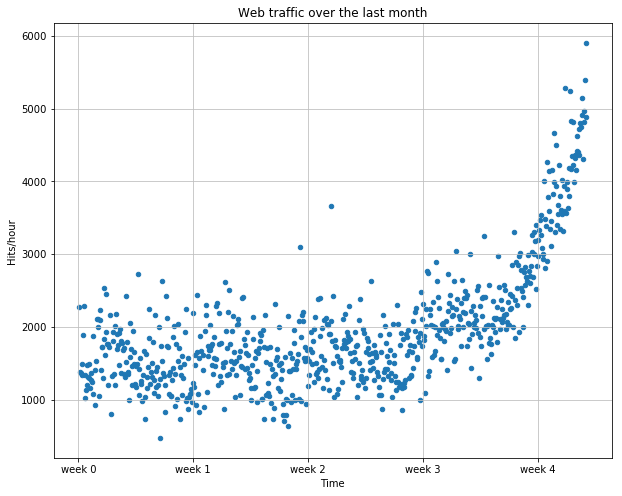

In [20]:
fig = plt.subplots(figsize=(10,8))
plt.scatter(x, y, s=20)
plt.title('Web traffic over the last month')
plt.xlabel('Time')
plt.ylabel('Hits/hour')
plt.xticks( [w*7*24 for w in range(5)],
              ['week %i'% w for w in range(5)])
plt.grid(True, linestyle='-', color='0.75')
plt.show()

##  복잡한 모델

먼저 다차원 모델로 피팅을 해보겠습니다.

이전 실습에서는 numpy 에서 다항 행렬을 만들어주는 함수를 사용했지만  더 편한 방법이 있습니다.

scipy 모듈의 polyfit 함수를 사용해보겠습니다.

In [21]:
import scipy as sp

In [22]:
fp = sp.polyfit(x, y, 2)
print(fp)

[  1.05322215e-02  -5.26545650e+00   1.97476082e+03]


위의 코드는 피처 x 의 2차항까지 사용했을 때의 결과입니다.

In [24]:
f2 = sp.poly1d(fp)

In [73]:
def plot_web_traffic(func=None, line=None, line_y=None):
    fig = plt.subplots(figsize=(10,8))
    plt.scatter(x, y, s=20)
    if not func is None:
        plt.plot(x, func(x), 'r-', linewidth=3, alpha=0.5)
    else:
        plt.plot(line, line_y, 'r-', linewidth=3, alpha=0.5)
    plt.title('Web traffic over the last month')
    plt.xlabel('Time')
    plt.ylabel('Hits/hour')
    plt.xticks( [w*7*24 for w in range(5)],
              ['week %i'% w for w in range(5)])
    plt.grid(True, linestyle='-', color='0.75')
    plt.show()

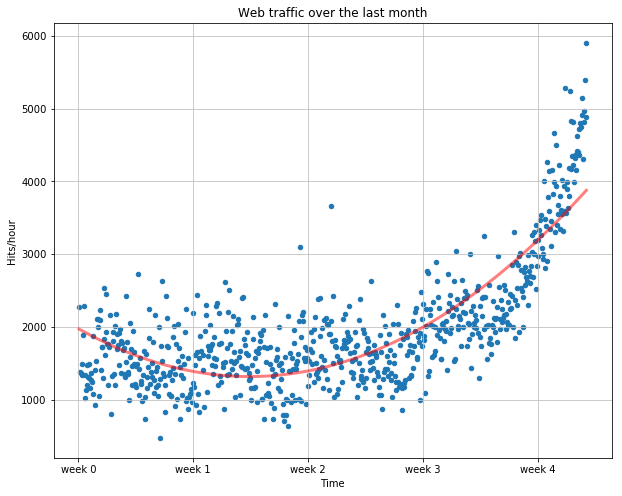

In [74]:
plot_web_traffic(f2)

## 더 복잡한 모델

x 피처의 16차항 까지 계산해서 적용시켜보겠습니다.

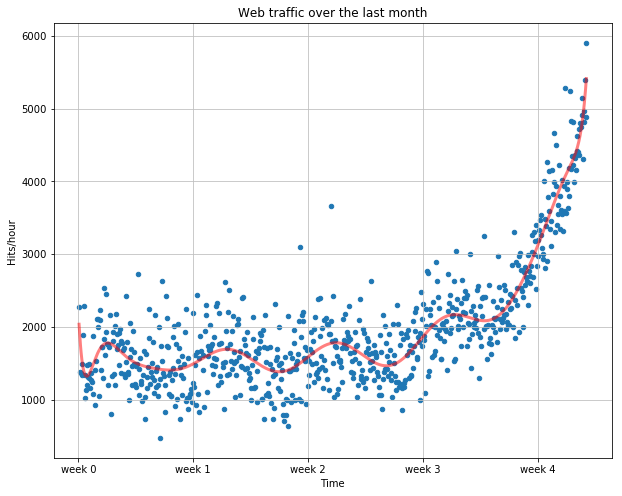

In [35]:
fp = sp.polyfit(x, y, 16)
func = sp.poly1d(fp)
plot_web_traffic(func)

## 구간분할

각 구간별로 곡선의 특성이 매우 다르다면 구간을 나눠서 회귀를 할 수도 있습니다.

이 데이터가 구간 분할의 장점을 보여주는 좋은 예는 아니지만 실습의 예로 한 번 해보겠습니다.

x 축을 5 개의 구간으로 나눠서 각 구간을 독립적인 2차 곡선으로 회귀를 하겠습니다.

코드 내용은 처음 보시는 분이면 이해하기 어려울 것 같지만 머신러닝에 익숙해지면 

쉽게 볼 수 있습니다.

In [86]:
bins = np.linspace(x.min(), x.max(),5, endpoint=False)
bins

array([   1. ,  149.4,  297.8,  446.2,  594.6])

각 점이 속한 구간을 계산합니다.

In [87]:
which_bin = np.digitize(x, bins=bins)
which_bin

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

각 구간에 대한 정보를 원핫 인코딩으로 만들어서 원래의 피처 x 에 추가하는 과정입니다.

In [88]:


from sklearn.preprocessing import OneHotEncoder

which_bin = which_bin.reshape(-1,1)
encoder = OneHotEncoder(sparse=False)  # sparse=True 면 매트릭스를 False 면 array 를 반환한다. 머신러닝에서 쓰는 인코딩은 False
encoder.fit(which_bin)

x_binned = encoder.transform(which_bin)
print(x_binned.shape)

(735, 5)


In [89]:
x_product = np.hstack([x_binned, x.reshape(-1,1) * x_binned, x.reshape(-1,1)** 2 * x_binned])

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
reg = LinearRegression().fit(x_product, y)

In [92]:
line = np.linspace(x.min(),x.max(),1000, endpoint=False).reshape(-1,1)
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [93]:
line_product = np.hstack([line_binned, line * line_binned, line ** 2 * line_binned])

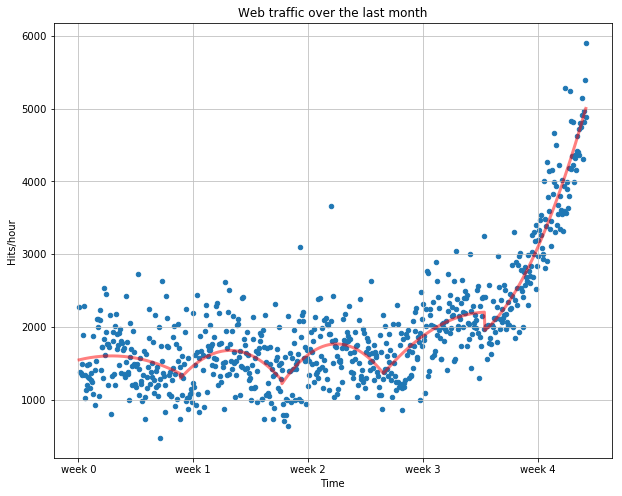

In [94]:
line_y = reg.predict(line_product)
plot_web_traffic(line=line, line_y=line_y)

이 회귀 결과에 만족한가요?  만약에 일주일을 주기로 패턴이 있는 데이터라면 구간을 나눠서 회귀를 하는 것이 효율적입니다.

이 데이터에 그럴 필요까지느 없어보이지만 구간 분할이라는 새로운 테크닉도 툴 박스에 담아두세요.